# RDKIT overview

To use this notebook make sure to download RDKIT with conda install rdkit

# major types of moleculer file formats
* SMILES -- plain text (string) [more description ](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
* sdf    -- plain text (acom coordinates)

## SMILES

Simplest way to reflect a molecule:
* atoms of chemical elements are represented by chemical symbols in capital letter, hydrogen is usually ignored. 
* bonds :
    * single bonds are not displayed 
    * for double '=' symbol
    * for triple '#' symbol
    * for quadruple '$' symbol 
* atoms that are bonded must stand nearby.
Ring structures are written by breaking each ring at an arbitrary point (although some choices will lead to a more legible SMILES than others) to make a 'straight non-ring' structure (as if it wasn't a ring) and adding numerical ring closure labels to show connectivity between non-adjacent atoms.
* aromacity is commonly illustrated by writing the constituent B, C, N, O, P and S atoms in lower-case forms b, c, n, o, p and s, respectively.
* for side chains representation of atomic gpoups branches are used.

pro :
* easy to write
* easy to store

cons:
* (usually) does not have a 3D information
* one molecule could have multiple (!) smiles

# importing data to RDKIT

rdkit have it's inner molecular data representation object (called mol object)

In [67]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit import DataStructs

# Data

Read the smiles data and load it into a dataframe. Index out the first SMILEs string and read it.

In [68]:
data = pd.read_csv("full_dataset_dd.csv",index_col=0)
data.head()

,SMILES_STD,pX_adj,ACTIVE
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,1
1,O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21,4.756962,0
2,CC(C)c1cc2c(cc1O)[C@@]1(C)CCCC(C)(C)[C@@H]1CC2,4.304518,0
3,COc1ccc(-c2cc(=O)c3c(O)cc(O)c(-c4cc(-c5cc(=O)c...,4.432109,0
4,COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1-c1c(O)cc...,4.117803,0


In [69]:
my_one_smile_string = data["SMILES_STD"][0]
print(my_one_smile_string)

Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21


Creates a mol object from a SMILEs string. 

In [70]:
my_one_mol_object = Chem.MolFromSmiles(my_one_smile_string,sanitize=True)

In [71]:
type(my_one_mol_object)

rdkit.Chem.rdchem.Mol

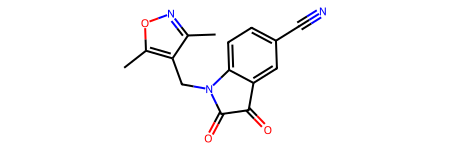

In [72]:
my_one_mol_object

Convert a mole object to a SMILEs string. Mol objects are useful because, unlike SMILEs strings, they can be rendered as 2D and 3D objects. 

In [73]:
Chem.MolToSmiles(my_one_mol_object)

'Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21'

In [74]:
Chem.MolToInchiKey(my_one_mol_object)

'AGHODQJTQBGFTA-UHFFFAOYSA-N'

In [75]:
my_one_mol_object.GetNumAtoms()

21

Converting a mol object to a mol block can be useful as the block holds the atomic coordinates of the atoms in the molecule. This lets them hold 3D information about the molecule in question. 

In [76]:
# Molecule representation
#https://en.wikipedia.org/wiki/Chemical_table_file#Extended_Connection_Table_(V3000)
print(Chem.MolToMolBlock(my_one_mol_object))


     RDKit          2D

 21 23  0  0  0  0  0  0  0  0999 V2000
   -2.2990    0.0563    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5980   -0.6937    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9684   -0.0836    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9720   -1.1983    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2220   -2.4973    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.8322   -3.8676    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7548   -2.1855    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6401   -3.1891    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2135   -2.7256    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000   -3.6073    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000   -5.1073    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2135   -2.7256    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6401   -3.1891    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0

In [77]:
from rdkit.Chem import AllChem
my_one_mol_object_3D = Chem.AddHs(my_one_mol_object) # by default rdkit's mol object does not store H's
AllChem.EmbedMolecule(my_one_mol_object_3D)

0

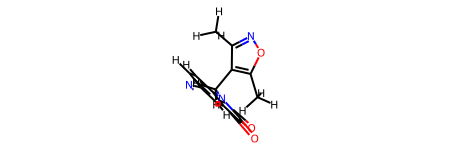

In [78]:
my_one_mol_object_3D

In [79]:
print(Chem.MolToMolBlock(my_one_mol_object_3D))


     RDKit          3D

 32 34  0  0  0  0  0  0  0  0999 V2000
   -0.4405    2.7686    0.8579 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4495    2.0032    1.7796 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4820    2.5302    2.5049 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.0423    1.6228    3.2116 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4625    0.4520    3.0340 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8438   -0.8251    3.6902 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4329    0.6824    2.1112 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4566   -0.3987    1.6378 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1041   -0.8905    0.3293 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8655   -1.9443    0.1074 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5219   -2.5135    1.0141 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.9464   -2.2249   -1.3193 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6944   -3.0885   -1.8690 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0011   -1.3132   -1

## Write a molecule to an sdf file

In [80]:
w = Chem.SDWriter('./my_one_mol_object_3D.sdf')
w.write(my_one_mol_object_3D)
w.close()

Works on linux to view the sdf file

In [81]:
%%bash
less ./my_one_mol_object_3D.sdf


     RDKit          3D

 32 34  0  0  0  0  0  0  0  0999 V2000
   -0.4405    2.7686    0.8579 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4495    2.0032    1.7796 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4820    2.5302    2.5049 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.0423    1.6228    3.2116 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4625    0.4520    3.0340 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8438   -0.8251    3.6902 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4329    0.6824    2.1112 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4566   -0.3987    1.6378 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1041   -0.8905    0.3293 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8655   -1.9443    0.1074 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5219   -2.5135    1.0141 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.9464   -2.2249   -1.3193 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6944   -3.0885   -1.8690 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0011   -1.3132   -1

# Working with pandas dataframes

You could work with help of PandasTools module (easy to use, good for "small" data).
Or you could do everything on your own, which is good when trying to deal with "big" data (more than 100K molecules).

In [82]:
data_small = data.head(40).copy()

In [83]:
data_small.head()

,SMILES_STD,pX_adj,ACTIVE
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,1
1,O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21,4.756962,0
2,CC(C)c1cc2c(cc1O)[C@@]1(C)CCCC(C)(C)[C@@H]1CC2,4.304518,0
3,COc1ccc(-c2cc(=O)c3c(O)cc(O)c(-c4cc(-c5cc(=O)c...,4.432109,0
4,COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1-c1c(O)cc...,4.117803,0


In [84]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(data_small, smilesCol='SMILES_STD',molCol='ROMol')


In [85]:
data_small.head()

,SMILES_STD,pX_adj,ACTIVE,ROMol
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,1,<rdkit.Chem.rdchem.Mol object at 0x111357a00>
1,O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21,4.756962,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3290>
2,CC(C)c1cc2c(cc1O)[C@@]1(C)CCCC(C)(C)[C@@H]1CC2,4.304518,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3450>
3,COc1ccc(-c2cc(=O)c3c(O)cc(O)c(-c4cc(-c5cc(=O)c...,4.432109,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3370>
4,COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1-c1c(O)cc...,4.117803,0,<rdkit.Chem.rdchem.Mol object at 0x110bd34c0>


**Important to know** ROMol is not a column with pictures, its column with Mol Objects, represented as pictures

In [86]:
# manual way
data_small["MolObj"] = data_small['SMILES_STD'].map(lambda x: Chem.MolFromSmiles(x))

In [87]:
data_small.head()

,SMILES_STD,pX_adj,ACTIVE,ROMol,MolObj
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,1,<rdkit.Chem.rdchem.Mol object at 0x111357a00>,<rdkit.Chem.rdchem.Mol object at 0x110b665e0>
1,O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21,4.756962,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3290>,<rdkit.Chem.rdchem.Mol object at 0x110b66c70>
2,CC(C)c1cc2c(cc1O)[C@@]1(C)CCCC(C)(C)[C@@H]1CC2,4.304518,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3450>,<rdkit.Chem.rdchem.Mol object at 0x110b66490>
3,COc1ccc(-c2cc(=O)c3c(O)cc(O)c(-c4cc(-c5cc(=O)c...,4.432109,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3370>,<rdkit.Chem.rdchem.Mol object at 0x110b661f0>
4,COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1-c1c(O)cc...,4.117803,0,<rdkit.Chem.rdchem.Mol object at 0x110bd34c0>,<rdkit.Chem.rdchem.Mol object at 0x110b66340>


Why do we need a manual way? Store Mol Objects **in memory could be hard**. so sometimes its useful to perform calculation of interest **on the fly**

In [88]:
# example of cacluclating n_atoms without storing MolObjects
data_small["n_Atoms"] = data_small['SMILES_STD'].map(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())

In [89]:
data_small.head()

,SMILES_STD,pX_adj,ACTIVE,ROMol,MolObj,n_Atoms
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,1,<rdkit.Chem.rdchem.Mol object at 0x111357a00>,<rdkit.Chem.rdchem.Mol object at 0x110b665e0>,21
1,O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21,4.756962,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3290>,<rdkit.Chem.rdchem.Mol object at 0x110b66c70>,26
2,CC(C)c1cc2c(cc1O)[C@@]1(C)CCCC(C)(C)[C@@H]1CC2,4.304518,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3450>,<rdkit.Chem.rdchem.Mol object at 0x110b66490>,21
3,COc1ccc(-c2cc(=O)c3c(O)cc(O)c(-c4cc(-c5cc(=O)c...,4.432109,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3370>,<rdkit.Chem.rdchem.Mol object at 0x110b661f0>,43
4,COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1-c1c(O)cc...,4.117803,0,<rdkit.Chem.rdchem.Mol object at 0x110bd34c0>,<rdkit.Chem.rdchem.Mol object at 0x110b66340>,41


## Drawing a mol grid

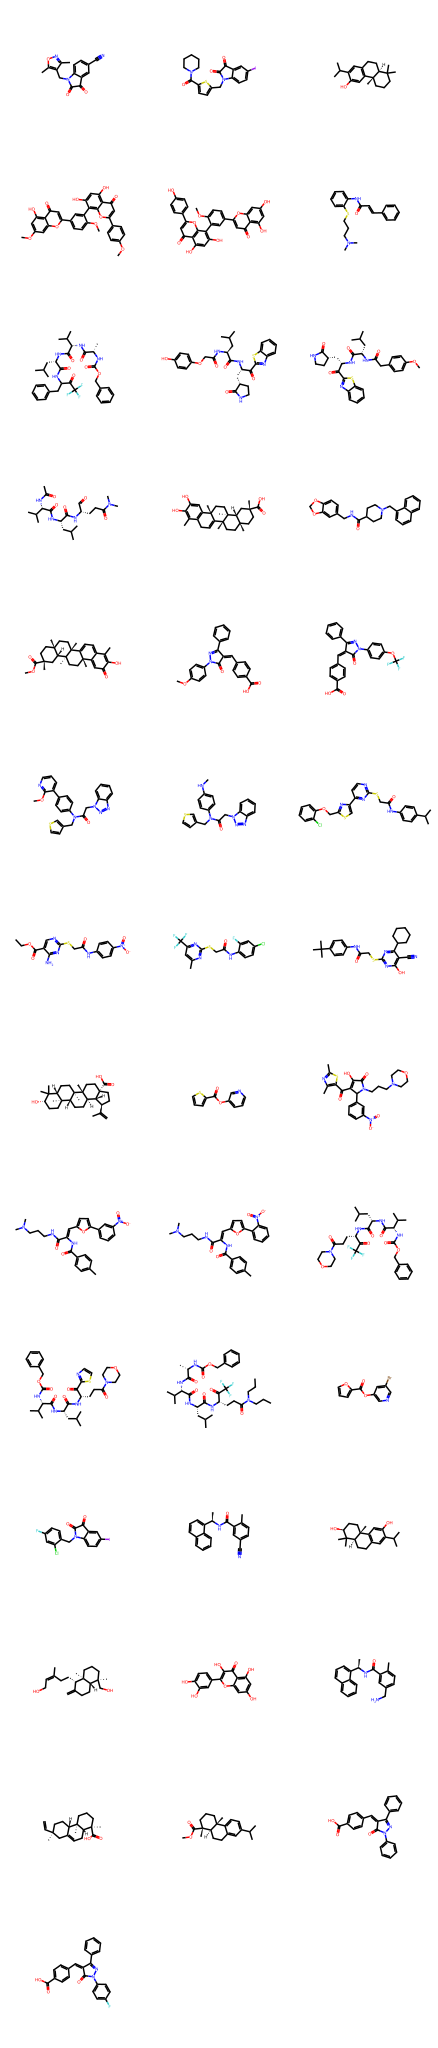

In [90]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(list(data_small.ROMol), useSVG=True)

# Molecular fingerprints

Molecular fingerprints are useful when trying to conduct similarity searches and other comparison tasks. This is useful when trying to perform classification and clustering.

![img](./fp_list.png)

In [91]:
my_this_mol_obj = data_small["ROMol"][0]
my_that_mol_obj = data_small["ROMol"][1]

## Path-Based Fingerprint

This type of fingerprint encodes information about the specific linear paths within a molecule. As the path length increases so does the chunk of atoms considered. Path Eneumeration shows all possible linear paths in the molecule up to a specific length. In the example below a maxPath of 7 means that the fingerprint will consider paths with up to 7 bonds. Each path is differentiated by a sequence of atoms and bond types along the path. 

In [142]:
this_fp = Chem.RDKFingerprint(my_this_mol_obj,maxPath=7,fpSize=512)
that_fp = Chem.RDKFingerprint(my_that_mol_obj,maxPath=7,fpSize=512)

In [93]:
this_fp

In [94]:
that_fp.ToBitString()

'11111111111111111111111111111111111111111111111101111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111011111011111111111111111111111101111111111101111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111011111111111111111111111101111011111111111111111111111111111111111111111111111111111111110111111111111111111111111111111101111111111111111111111'

In [95]:
import numpy as np
np.array(that_fp)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

To see how path length changes the fingerprint, see this illustration from OpenEye documentation


![pathfp](./PathEnumeration.png)

## Morgan Fingerprint

The Morgan Fingerprint is a type of molecular fingerprint used in cheminformatics to represent the structure of molecules. It's a circular fingerprint, and describes the environment around each atom within a specified radius. For example, a radius of 2 means that it will look at the atom, its neighbors, and the neighbors' neighbors. In the generated image below you can see that as the circular radius increases, so does the chunk of atoms considered. 

In [141]:
# Morgan FP
MFP_this = AllChem.GetMorganFingerprint(my_this_mol_obj,2)
MFP_this

[16:56:34] DEPRECATION WARNING: please use MorganGenerator


To see how changing the circular radius changes the fingerprint, see this illustration from OpenEye documentation

 
![pathfp](./CircularEnumeration.png)

Get the Morgan Fingerprint as a bit vector

In [97]:
MFP_this_bits = AllChem.GetMorganFingerprintAsBitVect(my_this_mol_obj,5,nBits=512)
MFP_this_bits

[16:40:25] DEPRECATION WARNING: please use MorganGenerator


In [98]:
MFP_this_bits.ToBitString()

'00000010001010101000000000000000010001000000000001000000000100010000000100001000100001000000100001000110000010001000000010000000010000000010001010000000000000000010000001000000000000000110000000010000000000000000101000001000000001000010000001000000100000000000000100000001000000100000000000011000000000010100000000100000010100000000000001000000000000001000100010010001000000000011000000000000000001000000000000000000001000010000000000000001000000000100100100000110000000000000000000000000000000000010000000000000'

Calculate the dice similarities betwen the two fingerprint bit strings.

In [99]:
DataStructs.DiceSimilarity(this_fp,this_fp)

1.0

In [100]:
DataStructs.DiceSimilarity(this_fp,that_fp)

0.9839679358717435

In [101]:
DataStructs.DiceSimilarity(this_fp,MFP_this_bits)

0.23172905525846701

## What does the bit mean?

A bit refers to a binary digit that can encode information about the presence or absence of certain substructures or features of the molecule. 

In [102]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi,nBits=512)

mfp2_svg = Draw.DrawMorganBit(mol, 29, bi, useSVG=True)
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi,fpSize=512)
rdk_svg = Draw.DrawRDKitBit(mol, 2, rdkbi, useSVG=True)

[16:40:25] DEPRECATION WARNING: please use MorganGenerator


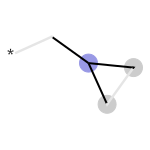

In [103]:
mfp2_svg

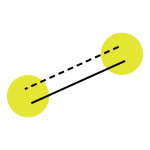

In [104]:
rdk_svg

## Molecular similarity

Molecular similarity measures how simliar two molecules are to one another based off various criteria. These can be structural features, functional groups, chemical properties, etc. Using molecular similarity allows us to virtually screen for molecules within a certain system or sharing properties. This is helpful when trying to discover new compounds, as we can use previous clustering of compounds to find ones with simliar properties. 

## Dice similarity

Dice similarity is a specific metric used to compare the similarity between two sets. This can be extended to molecular fingerprints. Dice similarity is especially useful when trying to compare two binary vectors (such as chemical fingerprints!). Dice similarity is a subset of molecular similarity.

![dice](./dice_sim.png)

## Tanimoto similarity 

The Tanimoto similarity is also used to compare two binary vectors of molecular fingerprints. The value of the similarity falls between 0 and 1 (with 0 being no similarity and 1 being all similarity).

![tani](./jacard_sim.jpg)

In [105]:
from rdkit import DataStructs
# Tanimoto
commonBits = this_fp&that_fp
print('this:',this_fp.GetNumOnBits(),'that:',that_fp.GetNumOnBits(),'num in common:',commonBits.GetNumOnBits())
print(commonBits.GetNumOnBits()/(this_fp.GetNumOnBits()+that_fp.GetNumOnBits()-commonBits.GetNumOnBits()))
print('Tanimoto:', DataStructs.TanimotoSimilarity(this_fp,that_fp))

this: 496 that: 502 num in common: 491
0.9684418145956607
Tanimoto: 0.9684418145956607


In [106]:
from sklearn.metrics import jaccard_score

In [107]:
jaccard_score(np.array(this_fp),np.array(that_fp))

0.9684418145956607

## Molecular similarity visualization 

This example generates visualizations that highlight the similarities and differences between two molecules based off their found fingerprints. This is a good way to visualize which parts contribute the most to their similarity and dissimilarity. This example is specifically using a Morgan Fingerpring and a Tanimoto Similarity to compare two molecules. 

In [143]:
from rdkit.Chem.Draw import SimilarityMaps

## Interpretation

The two images below (with the shaded colors on them) are the two molecules we are comparing. The intensity of the color determines how much each atom contributes either negatively or positively to the similarity between the two molecules. The red atoms signify a negative contribution to the similarity (as seen on the left in the first picture) and green signifies a positive contribution to the similarity. This finger print is using a circular radius of 1 for the Morgan Fingerprint and so will only consider a single atom at a time. 

[17:10:06] DEPRECATION WARNING: please use MorganGenerator
[17:10:06] DEPRECATION WARNING: please use MorganGenerator
[17:10:06] DEPRECATION WARNING: please use MorganGenerator
[17:10:06] DEPRECATION WARNING: please use MorganGenerator


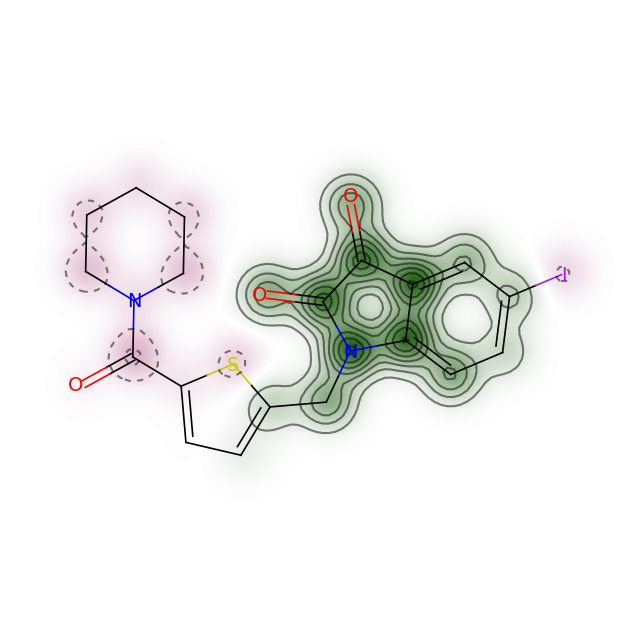

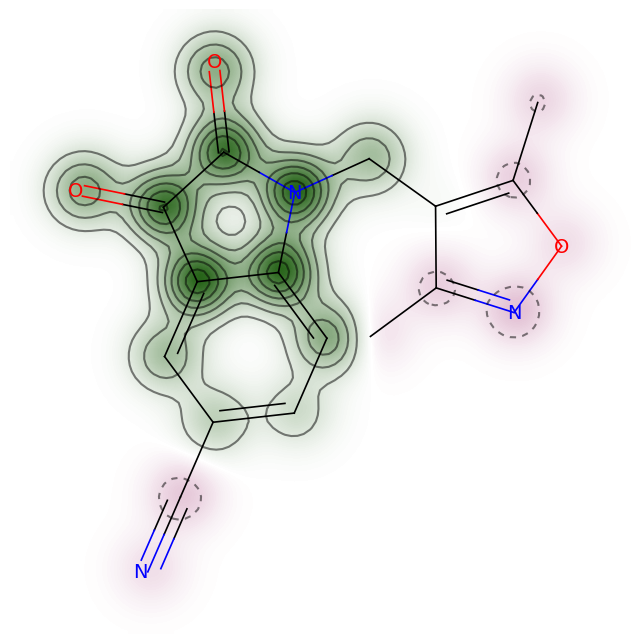

In [145]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(my_this_mol_obj,my_that_mol_obj, SimilarityMaps.GetMorganFingerprint)
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(my_that_mol_obj,my_this_mol_obj, SimilarityMaps.GetMorganFingerprint)

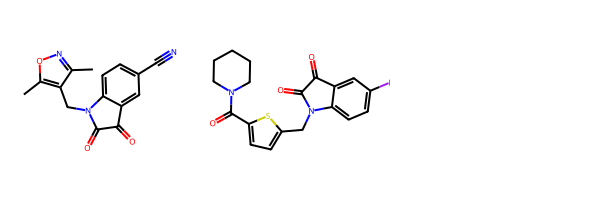

In [110]:
Draw.MolsToGridImage([my_this_mol_obj,my_that_mol_obj])

Now we are using a circular radius of 5 which allows the fingerprint to consider much larger groups of atoms. This can be important to visualize the contributions of functional groups as a whole rather than individual parts. 

[16:40:28] DEPRECATION WARNING: please use MorganGenerator
[16:40:28] DEPRECATION WARNING: please use MorganGenerator


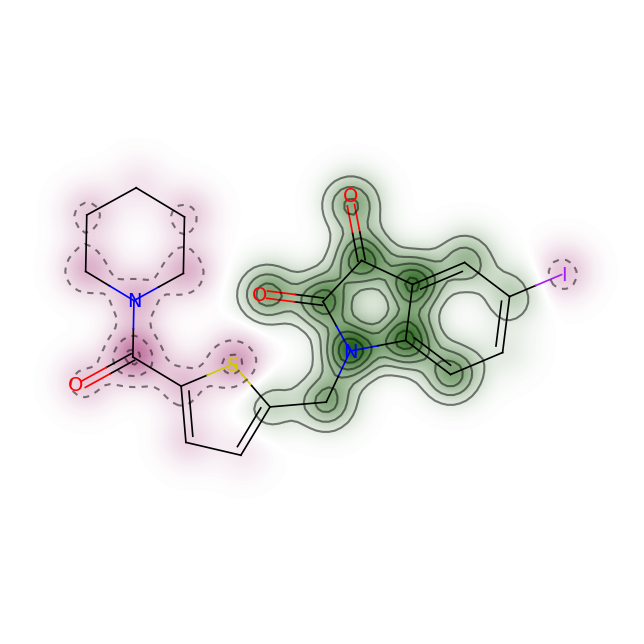

In [111]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(my_this_mol_obj, my_that_mol_obj,
                                                               lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=5, fpType='bv'),
                                                               metric=DataStructs.TanimotoSimilarity)


## On a bigger scale with pandas dataframe 

Now we will compare molecules within a pandas dataframe rather than one at a time. 

In [112]:
def SMI2FD(smiles_str,mP=7,fS=1024):
    fp = Chem.RDKFingerprint(Chem.MolFromSmiles(smiles_str),maxPath=mP,fpSize=fS)
    return np.array(fp)
data_small["RDKFP"]=data_small["SMILES_STD"].apply(SMI2FD)

In [113]:
data_small.head(1)

,SMILES_STD,pX_adj,ACTIVE,ROMol,MolObj,n_Atoms,RDKFP
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,1,<rdkit.Chem.rdchem.Mol object at 0x111357a00>,<rdkit.Chem.rdchem.Mol object at 0x110b665e0>,21,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ..."


In [114]:
first_fp = data_small["RDKFP"][0]

In [115]:
data_small["Tanimoto_sim_toFirst"]=data_small["RDKFP"].apply(lambda x: jaccard_score(x,first_fp))

In [116]:
data_small.sort_values(['Tanimoto_sim_toFirst'], inplace=False, ascending=False)

,SMILES_STD,pX_adj,ACTIVE,ROMol,MolObj,n_Atoms,RDKFP,Tanimoto_sim_toFirst
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,1,<rdkit.Chem.rdchem.Mol object at 0x111357a00>,<rdkit.Chem.rdchem.Mol object at 0x110b665e0>,21,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...",1.000000
1,O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21,4.756962,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3290>,<rdkit.Chem.rdchem.Mol object at 0x110b66c70>,26,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...",0.803014
32,Cc1nc(C)c(C(=O)C2=C(O)C(=O)N(CCCN3CCOCC3)C2c2c...,3.994048,0,<rdkit.Chem.rdchem.Mol object at 0x110b67450>,<rdkit.Chem.rdchem.Mol object at 0x110b65bd0>,34,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",0.765347
39,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,5.026872,1,<rdkit.Chem.rdchem.Mol object at 0x110b673e0>,<rdkit.Chem.rdchem.Mol object at 0x110b65690>,21,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...",0.764576
8,COc1ccc(CC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@...,5.372871,1,<rdkit.Chem.rdchem.Mol object at 0x110bd3680>,<rdkit.Chem.rdchem.Mol object at 0x110b666c0>,39,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, ...",0.675510
17,COc1ncccc1-c1ccc(N(Cc2ccsc2)C(=O)Cn2nnc3ccccc3...,6.154902,1,<rdkit.Chem.rdchem.Mol object at 0x110b67d80>,<rdkit.Chem.rdchem.Mol object at 0x110b65f50>,33,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, ...",0.675311
3,COc1ccc(-c2cc(=O)c3c(O)cc(O)c(-c4cc(-c5cc(=O)c...,4.432109,0,<rdkit.Chem.rdchem.Mol object at 0x110bd3370>,<rdkit.Chem.rdchem.Mol object at 0x110b661f0>,43,"[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...",0.666667
16,O=C(O)c1ccc(/C=C2\C(=O)N(c3ccc(OC(F)(F)F)cc3)N...,4.376751,0,<rdkit.Chem.rdchem.Mol object at 0x110b67ed0>,<rdkit.Chem.rdchem.Mol object at 0x110b65d20>,33,"[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.664628
7,CC(C)C[C@H](NC(=O)COc1ccc(O)cc1)C(=O)N[C@@H](C...,5.161151,1,<rdkit.Chem.rdchem.Mol object at 0x110bd3610>,<rdkit.Chem.rdchem.Mol object at 0x110b65fc0>,39,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, ...",0.663959
4,COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1-c1c(O)cc...,4.117803,0,<rdkit.Chem.rdchem.Mol object at 0x110bd34c0>,<rdkit.Chem.rdchem.Mol object at 0x110b66340>,41,"[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...",0.662231


## Descriptors

![desc](./de_list.png)

# Descriptors

This code calculates molecular descriptors, generates simliarity maps, and computes the distance between molecular descriptors. 

The TPSA (Topological Polar Surface Area) descriptor sums the surface areas of polar atoms in a molecule. This can be helpful when trying to predict drug absorption and permeability. 

The MolLogP descriptor finds the LogP value (octanol-water partition coefficient) which is a measure of a molecule's hydrophobicity. It's often used to predict the solubility and permeability of drugs. 

In [146]:
from rdkit.Chem import Descriptors
print("TPSA %s"%Descriptors.TPSA(my_this_mol_obj))
print("mollogP %s"%Descriptors.MolLogP(my_this_mol_obj))

TPSA 87.2
mollogP 1.89262


With rdMolDescriptors these descriptors can easilly be visualized on the actual molecule. The CalcCrippenContribs shows this as an image ad the similarity map shows the contributions of each atom as a shaded region. 

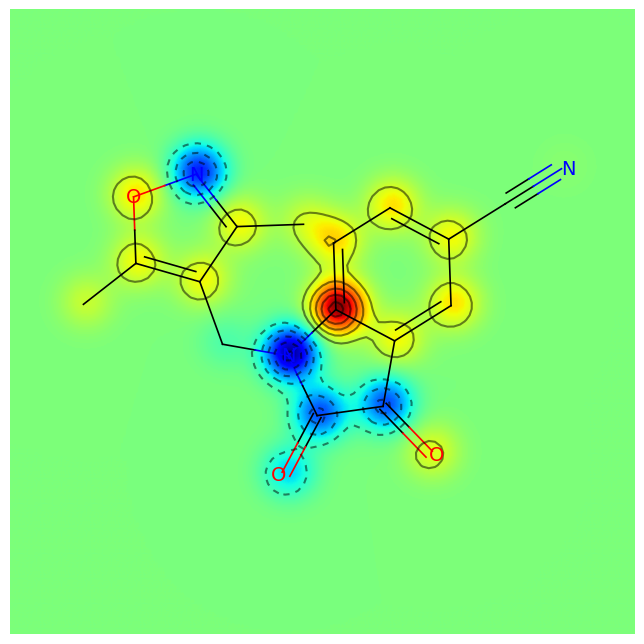

In [118]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(my_this_mol_obj)
fig = SimilarityMaps.GetSimilarityMapFromWeights(my_this_mol_obj,[x for x,y in contribs], colorMap='jet', contourLines=10)


This code allows us to calculate all the molecular descriptors that RDKit has to offer. 

In [120]:

from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
nms=[x[0] for x in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
print(len(nms))

210


In [121]:
my_precious_descs = [calc.CalcDescriptors(x) for x in [my_this_mol_obj,my_that_mol_obj]]
my_precious_descs

[16:40:29] DEPRECATION WARNING: please use MorganGenerator
[16:40:29] DEPRECATION WARNING: please use MorganGenerator
[16:40:29] DEPRECATION WARNING: please use MorganGenerator
[16:40:29] DEPRECATION WARNING: please use MorganGenerator
[16:40:29] DEPRECATION WARNING: please use MorganGenerator
[16:40:29] DEPRECATION WARNING: please use MorganGenerator


[(12.15316940665155,
  12.15316940665155,
  0.2268256330309899,
  -0.5971390778533638,
  0.7843287546239021,
  13.476190476190476,
  281.271,
  270.183,
  281.080041212,
  104,
  0,
  0.2992893120631929,
  -0.3610909567807797,
  0.3610909567807797,
  0.2992893120631929,
  1.3333333333333333,
  2.0952380952380953,
  2.7142857142857144,
  16.459993501970295,
  10.085766940372197,
  2.3628802090751835,
  -2.1566152174743736,
  2.3152687527557068,
  -2.2903766884569134,
  6.518156864644719,
  -0.11394379794696538,
  2.9257013644421384,
  2.045366224579918,
  794.5567148770965,
  15.14589989101247,
  11.50554324664689,
  11.50554324664689,
  10.024075805453153,
  6.347188840853463,
  6.347188840853463,
  4.866877394849856,
  4.866877394849856,
  3.5979134549038796,
  3.5979134549038796,
  2.412720297054183,
  2.412720297054183,
  -2.94,
  80597.22118765203,
  13.062128211576637,
  4.5610749192825795,
  1.9056651672603413,
  120.11310996096371,
  9.423004667823825,
  5.7602474188744415,
  0.

In [122]:
np.array(my_precious_descs).shape

(2, 210)

The Euclidian Distance between each set of descriptors quantifies how simliar or different the two molecules are based off their descriptors. This is useful as it allows us to find the similarity between two molecules from multiple descriptors. Additionally, descriptors can be applied to a wide range of properties and so allows us to compare them in more ways than just atom connectivity (for example, the similarity of two molecules based off of TPSA AND molLogP)

In [123]:
from sklearn.metrics import euclidean_distances
euclidean_distances(np.array(my_precious_descs))

array([[      0.        , 1315802.46680412],
       [1315802.46680412,       0.        ]])

For realworld data for descriptor calculation one of the most common used library is [Mordred Descriptors](https://github.com/mordred-descriptor/mordred) (~ 1500 descriptors)

# Substructure Search

This example shows how you can find specific substrates within a group of molecules. The creation of a SMARTS (SMiles ARbitrary Target Specification) pattern can help identify a substrate in order to help find it. SMARTS allows us to use more complex and flexible descriptions of molecular substructures. 

In this example specifically, let's break down what each piece of notation means:

1.	[*r6R1]1:
- [*]: Matches any atom.
- [r6]: Matches atoms that are part of a 6-membered ring.
- [R1]: Matches atoms that are part of exactly one ring.
- 1: Indicates the start of a ring, denoted by the number 1.
2.	[cR2]2:
- [c]: Matches aromatic carbon atoms.
- [R2]: Matches atoms that are part of exactly two rings.
- 2: Indicates the start of a second ring, denoted by the number 2.
3.	[cR1][cR1][cR1][cR1]:
- These are aromatic carbon atoms (c) that are part of exactly one ring (R1).
4.	[cR2]2:
- This is an aromatic carbon atom that is part of exactly two rings, closing the second ring started by 2.
5.	[*r6R1][*r6R1][*r6R1]1:
- These are any atoms that are part of a 6-membered ring and exactly one ring ([*r6R1]), closing the first ring started by 1.

In [124]:
benzo_six = Chem.MolFromSmarts('[*r6R1]1[cR2]2[cR1][cR1][cR1][cR1][cR2]2[*r6R1][*r6R1][*r6R1]1')

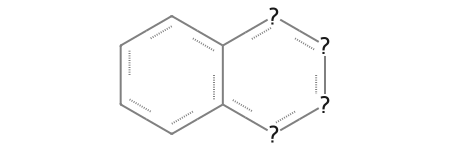

In [125]:
benzo_six

In [126]:
data_small[data_small['ROMol'] >= benzo_six][['ROMol']]

,ROMol
3,<rdkit.Chem.rdchem.Mol object at 0x110bd3370>
4,<rdkit.Chem.rdchem.Mol object at 0x110bd34c0>
12,<rdkit.Chem.rdchem.Mol object at 0x110bd30d0>
40,<rdkit.Chem.rdchem.Mol object at 0x110b67140>
44,<rdkit.Chem.rdchem.Mol object at 0x110b670d0>
45,<rdkit.Chem.rdchem.Mol object at 0x110b66f80>


In [127]:
data_small["ROMol"].apply(lambda x: x.HasSubstructMatch(benzo_six) )

0     False
1     False
2     False
3      True
4      True
5     False
6     False
7     False
8     False
9     False
11    False
12     True
13    False
15    False
16    False
17    False
19    False
21    False
24    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
41    False
42    False
44     True
45     True
47    False
48    False
49    False
50    False
Name: ROMol, dtype: bool

In [128]:
data_small["HasBenzoSix"]=data_small["ROMol"].apply(lambda x: x.HasSubstructMatch(benzo_six) )

This code pattern matches a SMARTS string to other molecules and creates a grid of matching molecules 

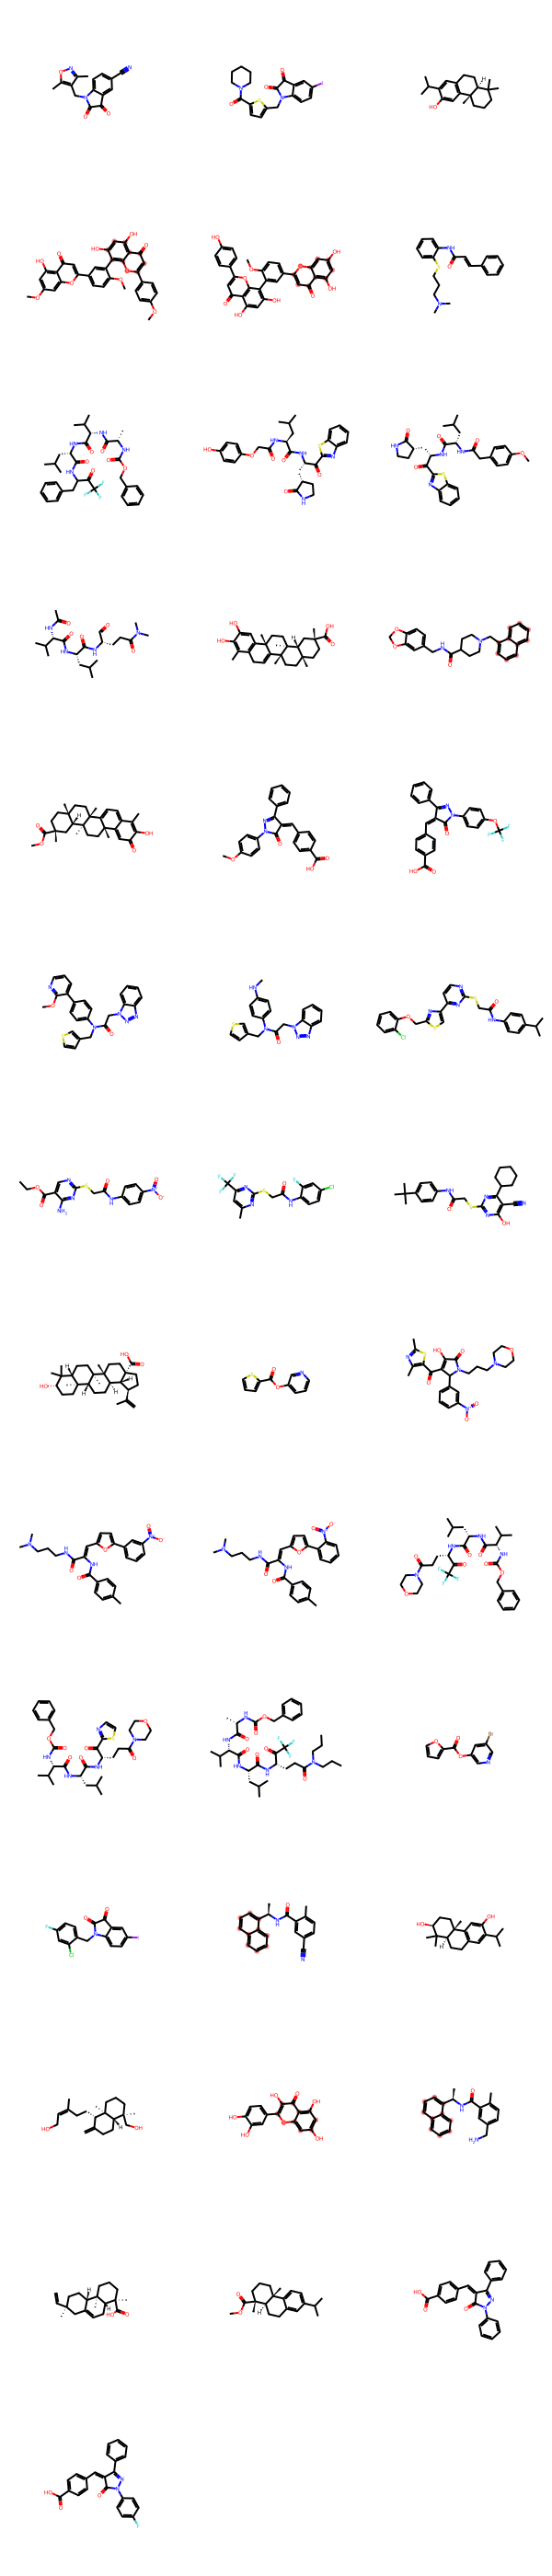

In [129]:

highlight_lists = [mol.GetSubstructMatch(benzo_six) for mol in data_small["ROMol"].to_list()]
Draw.MolsToGridImage(data_small["ROMol"].to_list(), 
                     highlightAtomLists = highlight_lists,
                     useSVG=False
                    )

Filters the molecules for the ones containing "HasBenzoSix"

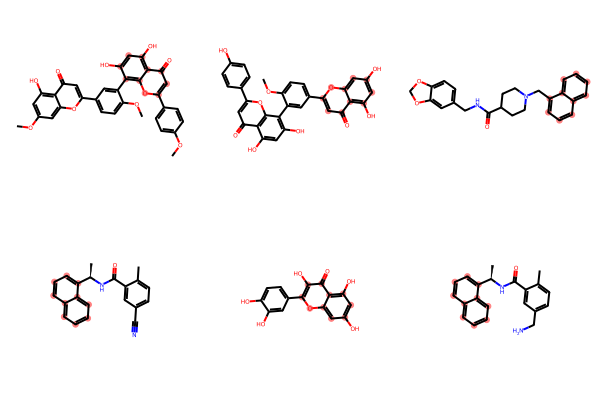

In [130]:
highlight_lists = [mol.GetSubstructMatch(benzo_six) for mol in data_small[data_small["HasBenzoSix"]]["ROMol"].to_list()]
Draw.MolsToGridImage(data_small[data_small["HasBenzoSix"]]["ROMol"].to_list(), 
                     highlightAtomLists = highlight_lists,
                     useSVG=False
                    )

In [131]:
AllChem.Compute2DCoords(benzo_six)

0

In [132]:
for mol in data_small[data_small["HasBenzoSix"]]["ROMol"].to_list():
    AllChem.GenerateDepictionMatching2DStructure(mol, benzo_six, acceptFailure = True)

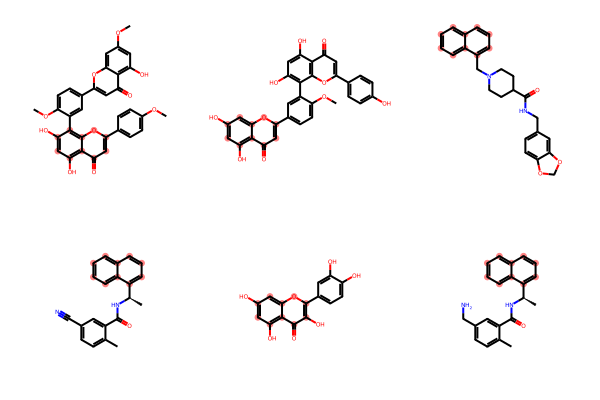

In [133]:
highlight_lists = [mol.GetSubstructMatch(benzo_six) for mol in data_small[data_small["HasBenzoSix"]]["ROMol"].to_list()]
Draw.MolsToGridImage(data_small[data_small["HasBenzoSix"]]["ROMol"].to_list(), 
                     highlightAtomLists = highlight_lists,
                     useSVG=False
                    )

## Murcko scaffolds

Murcko scaffolds are used to identify the core structure of a molecule, stripped away side chains and other features. This example shows how to generate and visualize one. 

In [134]:
from rdkit.Chem.Scaffolds import MurckoScaffold
core = MurckoScaffold.GetScaffoldForMol(my_this_mol_obj)

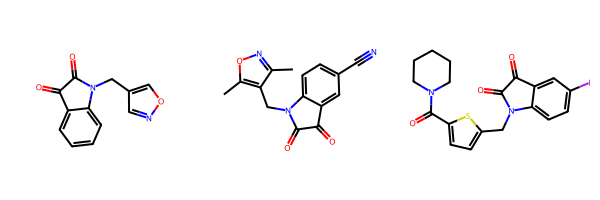

In [135]:
Draw.MolsToGridImage([core,my_this_mol_obj,my_that_mol_obj])

Here's what a Murcko Scaffold looks like as a SMILES string. 

In [136]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
Chem.MolToSmiles(fw)


'CC1C(C)C(CC2CCCC2)C2CCCCC12'

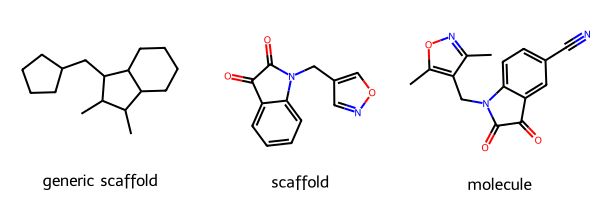

In [137]:
Draw.MolsToGridImage([fw,core,my_this_mol_obj],legends=["generic scaffold","scaffold","molecule"])

In [138]:
AllChem.Compute2DCoords(core)


0

In [139]:
for m in [core,my_this_mol_obj]:
    AllChem.GenerateDepictionMatching2DStructure(m,core)

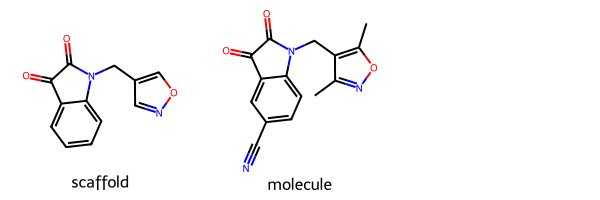

In [140]:
Draw.MolsToGridImage([core,my_this_mol_obj],legends=["scaffold","molecule"])